In [43]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', 20)

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from pathlib import Path
import os
import glob

current_dir = Path.cwd()
data_dir = current_dir.parent/'raw_data'
viz_dir = current_dir.parent/'visualizations'
os.makedirs(viz_dir, exist_ok=True)

for file in glob.glob(f'{data_dir}/*'): 
    print(file)

/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/plownyc_raw.json
/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/plownyc_dropduplicated.parquet
/Users/keenansmacbookairm3/Documents/GitHub/SnowDay_NYC/raw_data/nyc_centerline_shapefile.parquet


In [45]:
plow_nyc_df = pd.read_parquet(glob.glob(f'{data_dir}/*plownyc_dropduplicated.parquet'))
plow_nyc_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3833179 entries, 0 to 2043543
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   physical_id   3833179 non-null  object
 1   last_visited  3833179 non-null  object
 2   snapshot      3833179 non-null  object
dtypes: object(3)
memory usage: 117.0+ MB


In [66]:
# Some intersections have been visited at a much higher rates than the others
# Presumbly the area surrouding sanitation department facilities
plow_nyc_df.physical_id.value_counts().describe()

count    99765.000000
mean        38.422082
std         30.090595
min          1.000000
25%         17.000000
50%         29.000000
75%         53.000000
max        183.000000
Name: count, dtype: float64

In [67]:
plow_nyc_summary= plow_nyc_df.physical_id.value_counts().reset_index(name='plow_count')
plow_nyc_summary

,physical_id,plow_count
0,193904,183
1,42231,183
2,119430,182
3,36765,182
4,29301,182
...,...,...
99760,196967,1
99761,91698,1
99762,32350,1
99763,92290,1


In [ ]:
# Import NYC centerline shapefile
nyc_shapefile_df= pd.read_parquet(glob.glob(f'{data_dir}/*nyc_centerline_shapefile.parquet'))
nyc_shapefile_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122247 entries, 0 to 122246
Data columns (total 55 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   the_geom                122247 non-null  object
 1   physicalid              122247 non-null  object
 2   l_low_hn                84555 non-null   object
 3   l_high_hn               84555 non-null   object
 4   r_low_hn                84555 non-null   object
 5   r_high_hn               84555 non-null   object
 6   l_zip                   120886 non-null  object
 7   r_zip                   120964 non-null  object
 8   status                  122247 non-null  object
 9   trafdir                 122245 non-null  object
 10  rw_type                 122247 non-null  object
 11  pre_type                2862 non-null    object
 12  objectid                122247 non-null  object
 13  l_blockfaceid           109634 non-null  object
 14  r_blockfaceid           109629 non-n

In [ ]:
# Calculate the number of vists by snow removal trucks per unique street 
plow_nyc_summary= plow_nyc_df.physical_id.value_counts().reset_index(name='trucks_visit_count')
plow_nyc_summary

,physical_id,trucks_visit_count
0,193904,183
1,42231,183
2,119430,182
3,36765,182
4,29301,182
...,...,...
99760,196967,1
99761,91698,1
99762,32350,1
99763,92290,1


In [ ]:
bins = bins=[0, 2, 5, 9, 12, 16, 25, 36, plow_nyc_summary.trucks_visit_count.max()]
labels = [
    '0-2',
    '3-5',
    '6-9',
    '10-12',
    '13-16',
    '17-25',
    '26-35',
    '36+'
]

plow_nyc_summary['plow_bracket'] = pd.cut(
    plow_nyc_summary.trucks_visit_count,
    bins=bins, labels=labels, include_lowest=True
)

plow_nyc_summary

,physical_id,trucks_visit_count,plow_bracket
0,193904,183,36+
1,42231,183,36+
2,119430,182,36+
3,36765,182,36+
4,29301,182,36+
...,...,...,...
99760,196967,1,0-2
99761,91698,1,0-2
99762,32350,1,0-2
99763,92290,1,0-2


In [224]:
df = plow_nyc_summary.merge(nyc_shapefile_df, 
                            left_on='physical_id', right_on='physicalid', how='left')


df.head()

,physical_id,trucks_visit_count,plow_bracket,the_geom,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,status,trafdir,rw_type,pre_type,objectid,l_blockfaceid,r_blockfaceid,boroughcode,seglocstatus,lsubsect,rsubsect,twisted_parity_flag,posted_speed,segmentlength,streetwidth,created_date,modified_date,from_level_code,to_level_code,b5sc,snow_priority,number_travel_lanes,number_park_lanes,number_total_lanes,full_street_name,shape_length,globalid,street_name,stname_label,post_type,collectionmethod,pre_directional,truck_route_type,nonped,bike_lane,bike_trafdir,rwjurisdiction,carto_display_level,post_modifier,post_directional,within_bndy_dist,continuous_parity_flag,accessible,borough_indicator,pre_modifier,sandist_ind,fcc
0,193904,183,36+,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.810322847407,40.667088481378],[-73.810340984302,40.66702984369],[-73.810448724478,40.666681519906]]]}'",193904,None,None,None,None,11430,11420,2,TW,1,None,119903,42260741,42260326,4,None,3C,3C,N,25,152.32438621,50,2007-11-29T00:00:00.000Z,2024-04-21T22:21:10.000Z,13,17,421890,C,2,0,2,130 ST,61.347640840626511,9b07037b-4c35-4025-a02e-28de312fb1bc,130,130 ST,ST,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,42231,183,36+,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.994384961738,40.671411034828],[-73.994896518968,40.670798807756]]]}'",42231,127,147,120,156,11215,11215,2,TW,1,None,38283,1922602197,1922605941,3,X,5C,5C,N,25,264.36632416,42,2007-11-29T00:00:00.000Z,2023-02-21T10:42:37.000Z,13,13,305130,S,2,2,4,2 AVE,106.38168331654224,e8b2b433-c372-4c95-876e-b44a11f3c7ca,2,2 AVE,AVE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,119430,182,36+,"b'{""type"":""MultiLineString"",""coordinates"":[[[-74.167692767981,40.589024305993],[-74.16781995822,40.588844694025],[-74.167929487701,40.588657480938],[-74.167985380429,40.588538454182],[-74.168015281445,40.588472355025],[-74.168075740449,40.58829653703],[-74.168118433199,40.588118503617],[-74.168296995359,40.587487119562],[-74.168573601486,40.58661286314],[-74.168627559519,40.586298011744],[-74.168664649436,40.58604746572],[-74.168677664084,40.585933503128]]]}'",119430,0,0,2450,2562,10314,10314,2,FT,1,None,99949,1722610250,1722604018,5,None,4D,4D,N,35,347.50512167,54,2007-11-29T00:00:00.000Z,2021-05-07T06:48:18.000Z,13,13,544750,C,4,0,4,RICHMOND AVE,468.58757082443839,b3f948cb-fb6d-4d04-9c11-0d720e6fea65,RICHMOND,RICHMOND AVE,AVE,None,None,2,None,None,None,None,10,None,None,None,None,None,None,None,None,None
3,36765,182,36+,"b'{""type"":""MultiLineString"",""coordinates"":[[[-74.019716814838,40.649868954001],[-74.020295713812,40.649310910677]]]}'",36765,5101,5199,5100,5198,11232,11232,2,TW,1,None,33367,1922608972,1922602530,3,None,3C,3C,N,25,259.11402161,56,2007-11-29T00:00:00.000Z,2024-04-10T11:44:37.000Z,13,13,305010,C,2,2,4,1 AVE,104.19593204296888,ba4d7437-ca7e-4e76-a330-55ec098ae6e6,1,1 AVE,AVE,None,None,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,29301,182,36+,"b'{""type"":""MultiLineString"",""coordinates"":[[[-73.846540276792,40.771329643972],[-73.846626559835,40.769635395969]]]}'",29301,30-001,30-099,30-000,30-098,11354,11354,2,TW,1,None,26405,112265134,112262868,4,None,5E,5E,N,25,617.73337993,38,2007-11-29T00:00:00.000Z,2017-03-17T09:40:52.000Z,13,13,421490,H,1,2,3,122 ST,249.22115289657887,53afad14-778f-4da1-bb13-14beab995392,122,122 ST,ST,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [90]:
from shapely.geometry import shape
import json
import geopandas as gpd

# Unpacking and processing the_geom field into geometry
def bytes_to_geometry(b):
    if pd.isna(b):
        return None
    return shape(json.loads(b.decode('utf-8')))

df['geometry'] = df['the_geom'].apply(bytes_to_geometry)

# Create a new geoPandas dataframe 
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [91]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100410 entries, 0 to 100409
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   physical_id             100410 non-null  object  
 1   trucks_visit_count      100410 non-null  int64   
 2   plow_bracket            100410 non-null  category
 3   the_geom                99758 non-null   object  
 4   physicalid              99758 non-null   object  
 5   l_low_hn                80496 non-null   object  
 6   l_high_hn               80496 non-null   object  
 7   r_low_hn                80496 non-null   object  
 8   r_high_hn               80496 non-null   object  
 9   l_zip                   99567 non-null   object  
 10  r_zip                   99649 non-null   object  
 11  status                  99758 non-null   object  
 12  trafdir                 99758 non-null   object  
 13  rw_type                 99758 non-null   object  
 

In [ ]:
gdf_counts = gdf.merge(pivot_df, left_on='physical_id', right_index=True)
gdf_counts.infdo(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3372617 entries, 0 to 3372616
Data columns (total 60 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   physical_id             3372617 non-null  object  
 1   last_visited            3372617 non-null  object  
 2   snapshot                3372617 non-null  object  
 3   the_geom                3345373 non-null  object  
 4   physicalid              3345373 non-null  object  
 5   l_low_hn                2705148 non-null  object  
 6   l_high_hn               2705148 non-null  object  
 7   r_low_hn                2705148 non-null  object  
 8   r_high_hn               2705148 non-null  object  
 9   l_zip                   3339405 non-null  object  
 10  r_zip                   3342631 non-null  object  
 11  status                  3345373 non-null  object  
 12  trafdir                 3345373 non-null  object  
 13  rw_type                 3345373 no

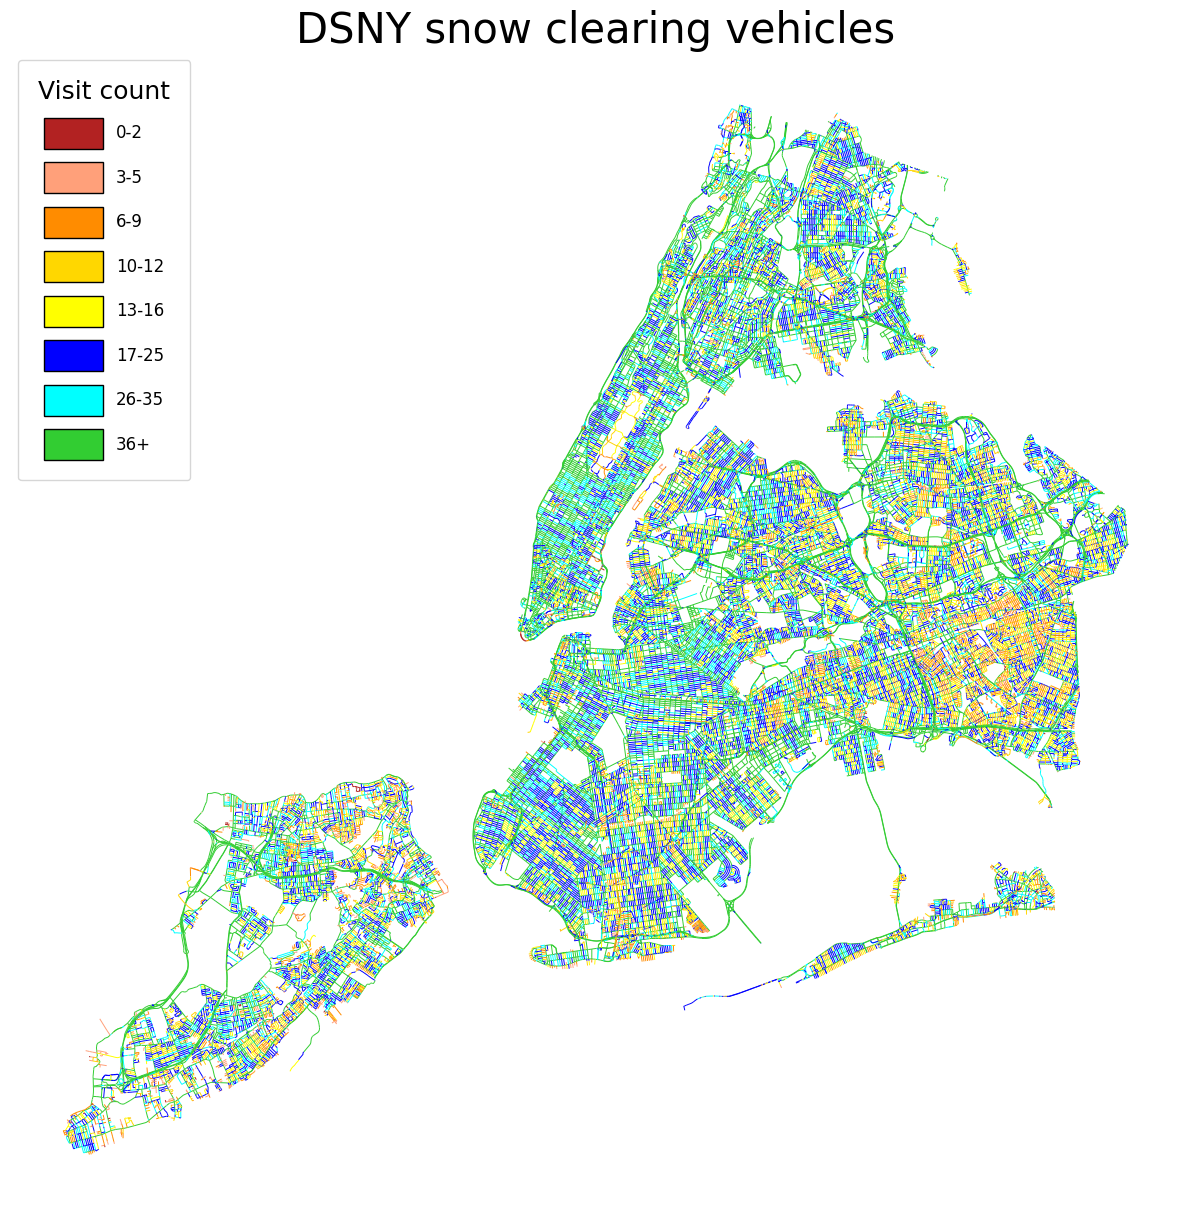

In [121]:
from matplotlib.patches import Patch

bracket_colors = {
   '0-2':'firebrick', 
   '3-5':'lightsalmon', 
   '6-9':'darkorange', 
   '10-12':'gold', 
   '13-16':'yellow', 
   '17-25':'blue', 
   '26-35':'cyan',
   '36+':'limegreen'
}

fig, ax = plt.subplots(1, 1, figsize=(20, 15))

gdf.plot(
    color=gdf['plow_bracket'].map(bracket_colors),
    ax=ax,
    linewidth=0.7
)

legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in bracket_colors.items()
]

ax.legend(
    handles=legend_elements,
    title="Visit count",
    loc='upper left',
    frameon=True,
    fontsize=12,          
    title_fontsize=18,    
    handlelength=3.5,    
    handleheight=2.5,
    borderpad=1.2,
    labelspacing=0.8
)


ax.set_title("DSNY snow clearing vehicles", fontsize=30)
ax.axis('off')

plt.show()

/var/folders/f2/xbsrplkj23z71l_fw6890_hr0000gn/T/ipykernel_82497/68272949.py:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  plow_nyc_3857.plot(


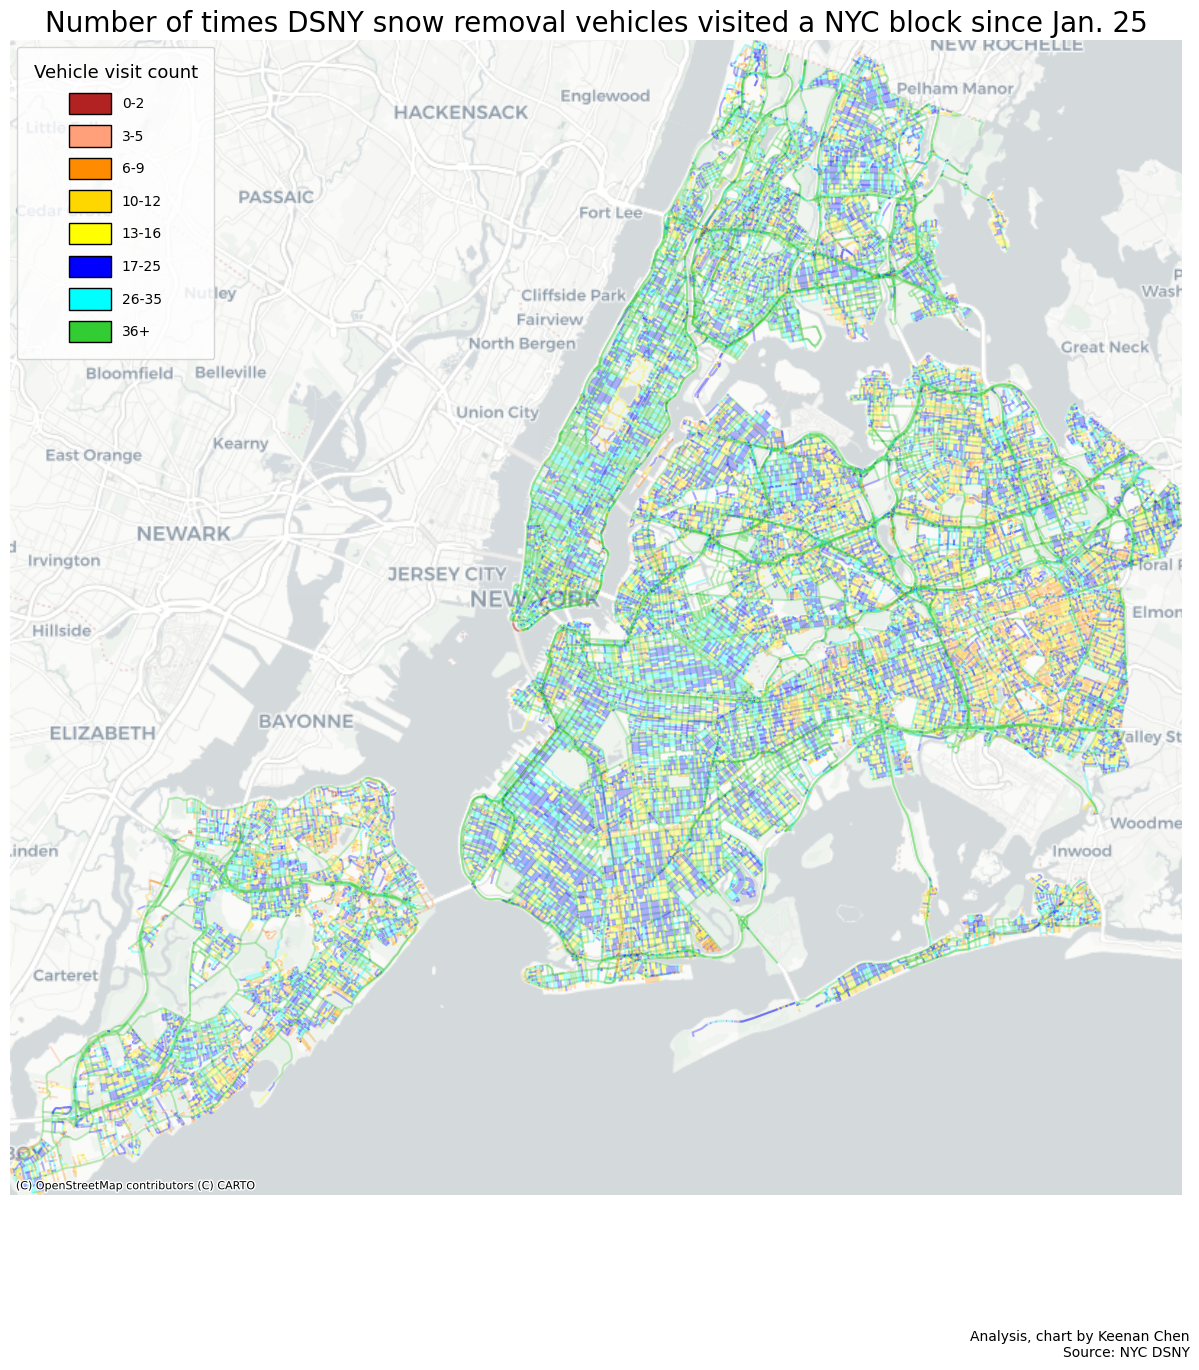

In [222]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

if gdf_web.crs is None:
    x_min, y_min, x_max, y_max = gdf_web.total_bounds
    if -180 <= x_min <= 180 and -90 <= y_min <= 90:
        gdf_web = gdf_web.set_crs(epsg=4326)
    else:
        gdf_web = gdf_web.gdf_web(epsg=2263)

plow_nyc_3857 = gdf_web.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(25, 15))
plow_nyc_3857.plot(
    column='plow_bracket',
    categorical=True,
    ax=ax,
    edgecolor='white',
    alpha=0.3,
    color=plow_nyc_3857['plow_bracket'].map(bracket_colors)
)

ax.set_xlim(plow_nyc_3857.total_bounds[[0, 2]])
ax.set_ylim(plow_nyc_3857.total_bounds[[1, 3]])
cx.add_basemap(ax, crs=plow_nyc_3857.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=label)
    for label, color in bracket_colors.items()
]

ax.legend(
    handles=legend_elements,
    title="Vehicle visit count",
    loc='upper left',
    frameon=True,
    fontsize=10,          
    title_fontsize=13,    
    handlelength=3,    
    handleheight=2,
    borderpad=1.2,
    labelspacing=0.8
)


ax.set_title("Number of times DSNY snow removal vehicles visited a NYC block since Jan. 25", fontsize=20)

plt.figtext(0.75, 0.0000005,       
    "Analysis, chart by Keenan Chen\nSource: NYC DSNY",
    ha='right', 
    va='bottom', 
    fontsize=10,
    
)

plt.show()


In [113]:
import contextily as ctx

gdf = gdf.set_crs(epsg=4326)
gdf_web = gdf.to_crs(epsg=3857)

In [223]:
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import Geocoder

# Processing gdf
gdf_web_folium = gdf_web[['plow_bracket', 'trucks_visit_count', 'geometry', 'l_zip', 'full_street_name']].copy()
gdf_web_folium['geometry'] = gdf_web_folium['geometry'].simplify(tolerance=0.0001)
gdf_web_folium = gdf_web_folium.rename(columns={'l_zip':'zip_code'})
gdf_web_folium['plow_bracket'] = gdf_web_folium['plow_bracket'].astype(str).str.strip()
gdf_web_folium['trucks_visit_count'] = gdf_web_folium['trucks_visit_count'].astype(int)
gdf_web_folium = gdf_web_folium.to_crs(epsg=4326)

# Setting up Folium base map
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=11,
    tiles="CartoDB Positron",
    prefer_canvas=True
)

bracket_colors = {
   '0-2':'firebrick', 
   '3-5':'lightsalmon', 
   '6-9':'darkorange', 
   '10-12':'gold', 
   '13-16':'yellow', 
   '17-25':'blue', 
   '26-35':'cyan',
   '36+':'limegreen'
}

def style_function(x):
    bracket = str(x['properties']['plow_bracket']).strip()
    color = bracket_colors.get(bracket, 'lightgrey')
    return {
        'fillColor': color,
        'color': color,
        'weight': 1.2,
        'fillOpacity': 0.5
    }


tooltip = GeoJsonTooltip(
    fields=['full_street_name', 'zip_code', 'trucks_visit_count'],
    aliases=['Street Name:', 'Zip Code:', 'Truck Visit Count:'],
    localize=True
)

folium.GeoJson(
    gdf_web_folium.to_json(),
    style_function=style_function,
    tooltip=tooltip,
    name="Snow Removal"
).add_to(m)

# Adding a Geocoder search bar
Geocoder(collapsed=False, add_marker=True).add_to(m)

m.get_root().html.add_child(folium.Element("""
<style>
.leaflet-control-geocoder {
    z-index: 1100 !important;
}
</style>
"""))

# Adding customized legends 
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 220px; height: auto; 
    border:2px solid grey; z-index:999; font-size:14px;
    background-color:white; padding:10px;
    box-shadow: 3px 3px 6px rgba(0,0,0,0.3);
">
    <b>DSNY Snow Removal<br>Truck Visit Count</b><br><br>
'''
for label, color in bracket_colors.items():
    legend_html += f'''
    <i style="background:{color};width:18px;height:18px;
              display:inline-block;margin-right:5px;
              border:1px solid black;"></i>{label}<br>
    '''
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Saving the map into html
m.save(viz_dir / 'interactive_snow_plowing.html')
